# 2.3. Get the Data

## 2.3.2. Download the Data

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.3.3. Take a Quick Look at the Data Structure

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


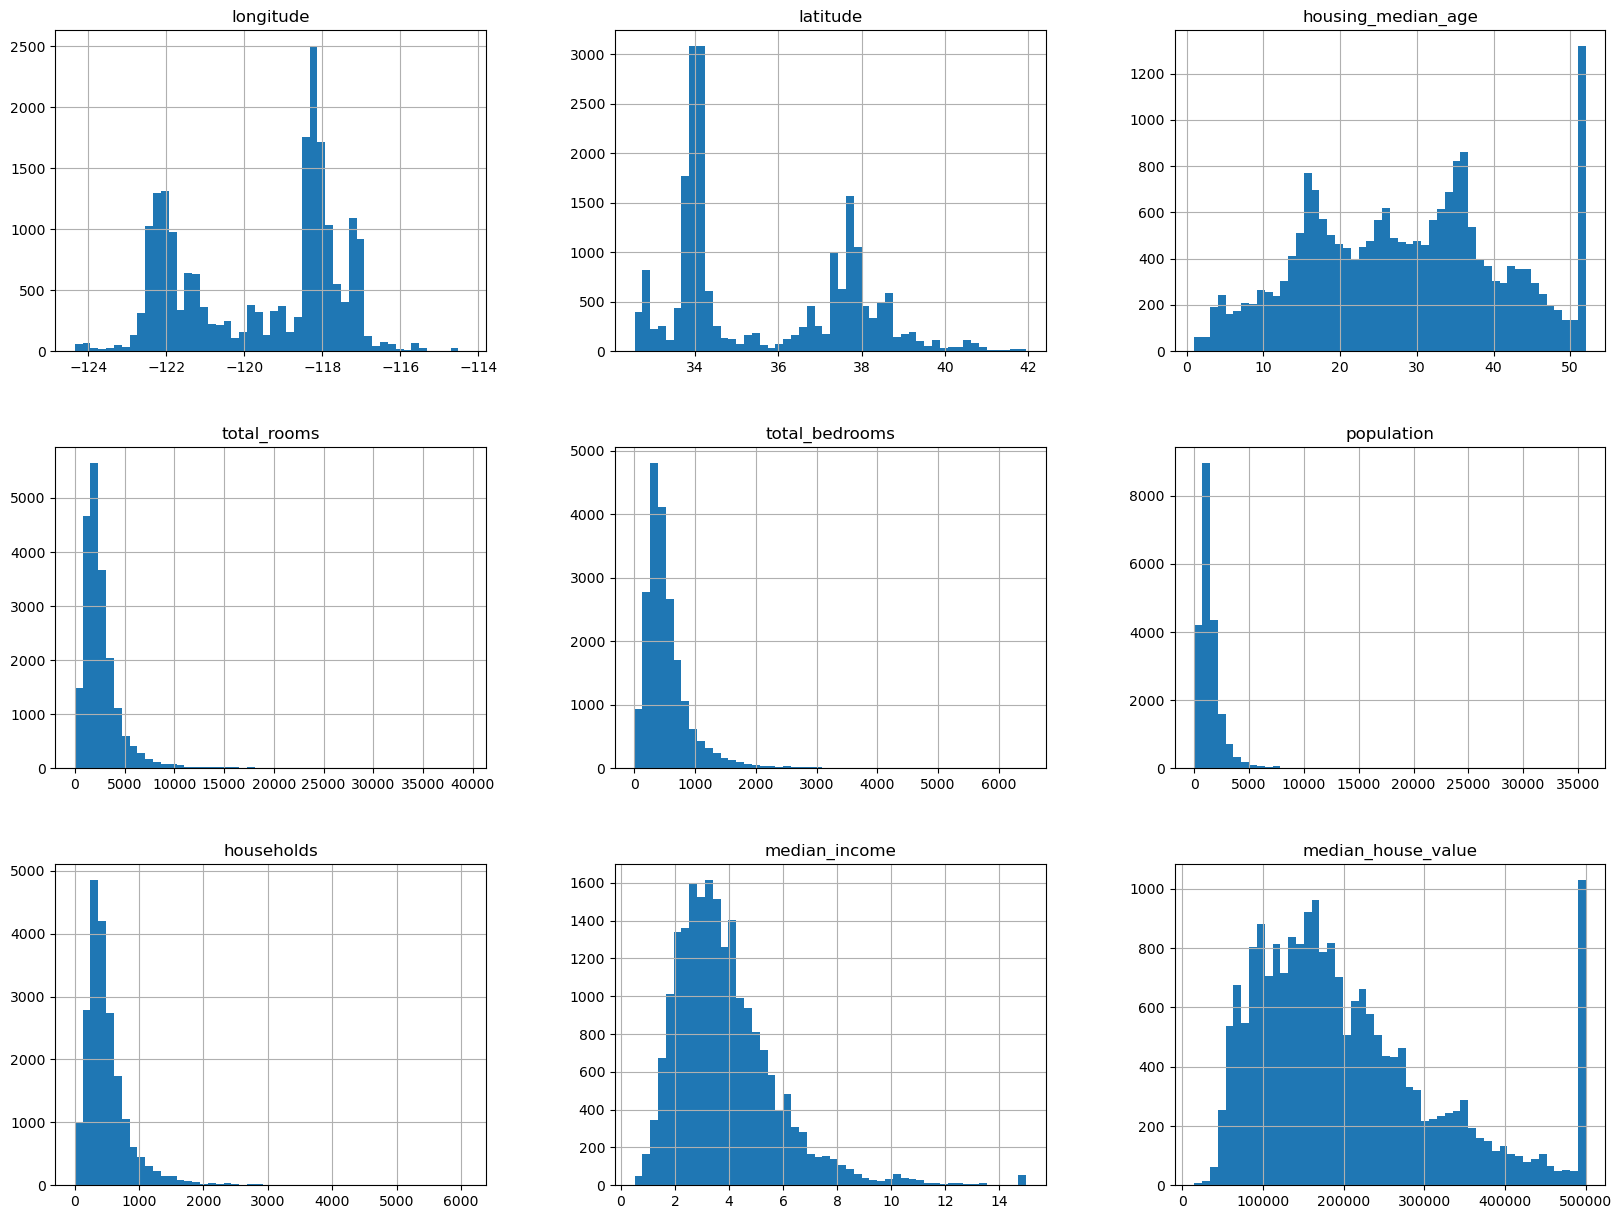

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## 2.3.4. Create a Test Set

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=77)

In [8]:
len(train_set)

16512

In [9]:
len(test_set)

4128

# 2.4. Discover and Visualize the Data to Gain Insights

In [10]:
housing = train_set.copy()

## 2.4.1. Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

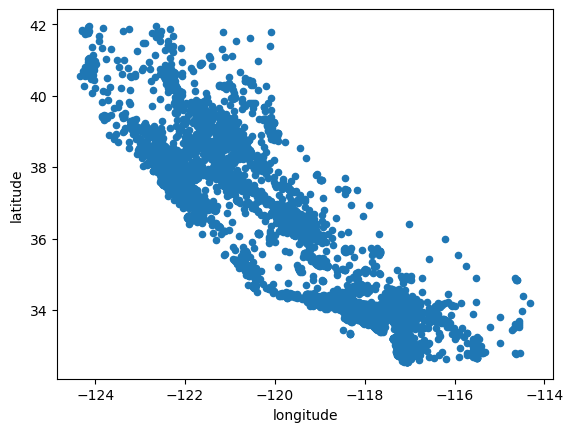

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")

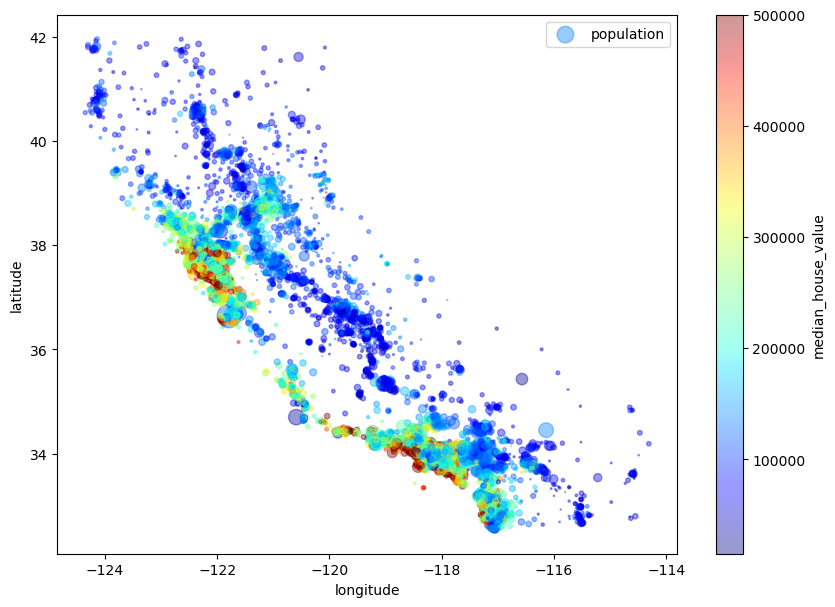

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## 2.4.2. Looking for Correlations

In [13]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"]

longitude            -0.048894
latitude             -0.142017
housing_median_age    0.110974
total_rooms           0.134002
total_bedrooms        0.049663
population           -0.024399
households            0.066048
median_income         0.687866
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [14]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687866
total_rooms           0.134002
housing_median_age    0.110974
households            0.066048
total_bedrooms        0.049663
population           -0.024399
longitude            -0.048894
latitude             -0.142017
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

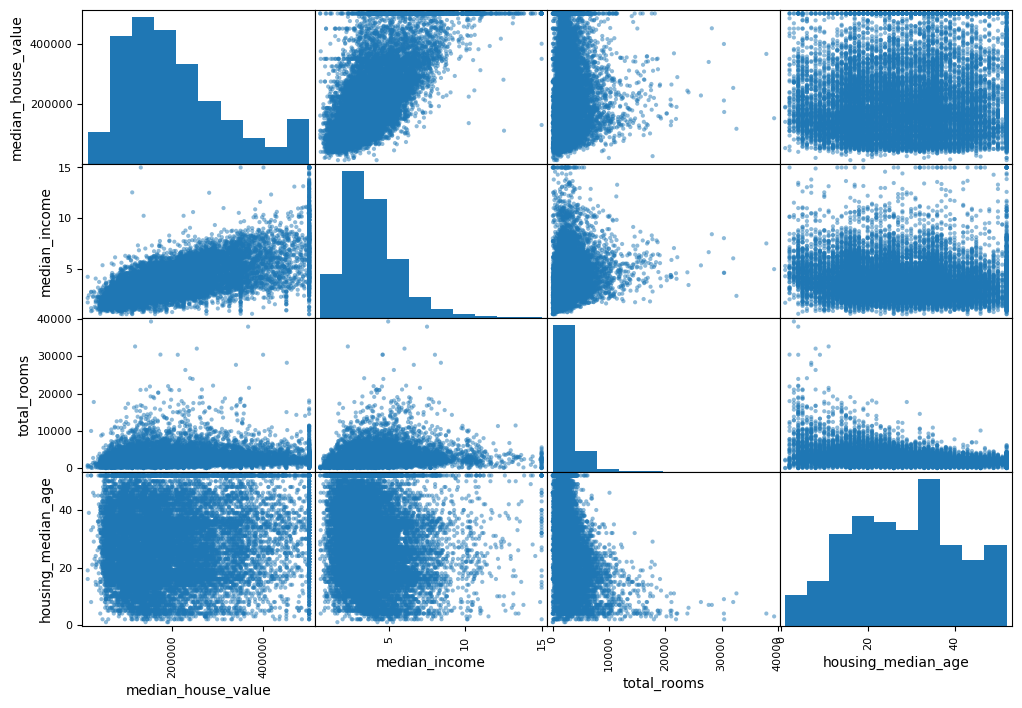

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

## 2.4.3. Experimenting with Attribute Combinations

In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687866
rooms_per_household         0.146371
total_rooms                 0.134002
housing_median_age          0.110974
households                  0.066048
total_bedrooms              0.049663
population_per_household   -0.022260
population                 -0.024399
longitude                  -0.048894
latitude                   -0.142017
bedrooms_per_room          -0.256896
Name: median_house_value, dtype: float64

# 2.5. Prepare the Data for Machine Learning Algorithms

In [17]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

## 2.5.1. Data Cleaning

To demonstrate each of 3 options, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [18]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10495,-117.66,33.51,18.0,2626.0,NaN,1302.0,522.0,4.0167,<1H OCEAN
15975,-122.45,37.77,52.0,2602.0,NaN,1330.0,647.0,3.5435,NEAR BAY
14331,-117.15,32.72,51.0,1321.0,NaN,781.0,499.0,1.3071,NEAR OCEAN
17973,-121.95,37.31,27.0,4140.0,NaN,2135.0,893.0,3.6292,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN


In [28]:
# Option 1
sample_incomplete_rows.dropna(subset=["total_bedrooms"]).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10495,-117.66,33.51,18.0,2626.0,434.0,1302.0,522.0,4.0167,<1H OCEAN
15975,-122.45,37.77,52.0,2602.0,434.0,1330.0,647.0,3.5435,NEAR BAY
14331,-117.15,32.72,51.0,1321.0,434.0,781.0,499.0,1.3071,NEAR OCEAN
17973,-121.95,37.31,27.0,4140.0,434.0,2135.0,893.0,3.6292,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,434.0,4956.0,1483.0,5.5061,<1H OCEAN


In [20]:
# Option 2
sample_incomplete_rows.drop("total_bedrooms", axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
10495,-117.66,33.51,18.0,2626.0,1302.0,522.0,4.0167,<1H OCEAN
15975,-122.45,37.77,52.0,2602.0,1330.0,647.0,3.5435,NEAR BAY
14331,-117.15,32.72,51.0,1321.0,781.0,499.0,1.3071,NEAR OCEAN
17973,-121.95,37.31,27.0,4140.0,2135.0,893.0,3.6292,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN


In [21]:
# Option 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows.head()

C:\Users\qorud\AppData\Local\Temp\ipykernel_24072\2055482841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10495,-117.66,33.51,18.0,2626.0,434.0,1302.0,522.0,4.0167,<1H OCEAN
15975,-122.45,37.77,52.0,2602.0,434.0,1330.0,647.0,3.5435,NEAR BAY
14331,-117.15,32.72,51.0,1321.0,434.0,781.0,499.0,1.3071,NEAR OCEAN
17973,-121.95,37.31,27.0,4140.0,434.0,2135.0,893.0,3.6292,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,434.0,4956.0,1483.0,5.5061,<1H OCEAN


## 2.5.2. Handling Text and Categorical Attributes

In [22]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
19437,INLAND
2690,INLAND
12690,INLAND
8294,NEAR OCEAN
17990,<1H OCEAN
6578,<1H OCEAN
384,NEAR BAY
19810,INLAND
13167,INLAND
7293,<1H OCEAN


In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [4.],
       [0.],
       [0.],
       [3.],
       [1.],
       [1.],
       [0.]])

In [24]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 2.5.4. Feature Scaling

In [25]:
housing["total_bedrooms"].describe()

count    16356.000000
mean       536.586023
std        419.035109
min          1.000000
25%        296.000000
50%        434.000000
75%        645.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
housing["total_bedrooms_scaled"] = scaler.fit_transform(housing[["total_bedrooms"]])
housing["total_bedrooms_scaled"].describe()

count    16356.000000
mean         0.083114
std          0.065027
min          0.000000
25%          0.045779
50%          0.067194
75%          0.099938
max          1.000000
Name: total_bedrooms_scaled, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing["total_bedrooms_standardized"] = scaler.fit_transform(housing[["total_bedrooms"]])
housing["total_bedrooms_standardized"].describe()

count    1.635600e+04
mean    -3.943070e-17
std      1.000031e+00
min     -1.278180e+00
25%     -5.741604e-01
50%     -2.448223e-01
75%      2.587308e-01
max      1.410048e+01
Name: total_bedrooms_standardized, dtype: float64